# Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
np.random.seed(0)
from scipy import stats
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import MinMaxScaler

# Load in Data

## Basic Stats 

In [2]:
bs89 = pd.read_csv('basic_stats_18_19.csv', index_col = 0)

In [3]:
bs89.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP', 'G', 'A', 'PTS▼', '+/-', 'PIM',
       'PS', 'EV', 'PP', 'SH', 'GW', 'EV.1', 'PP.1', 'SH.1', 'S', 'S%', 'TOI',
       'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'FO%'],
      dtype='object')

In [4]:
bs89.drop(['PS'], axis = 1, inplace = True)

In [5]:
bs89.rename(columns = {'PTS▼': 'PTS', 'EV': 'EVG', 'PP': 'PPG', 'SH': 'SHG', 'EV.1': 'EVA', 'PP.1': 'PPA', 'SH.1': 'SHA'}, inplace = True)

## Advanced Stats 

In [6]:
as89 = pd.read_csv('advanced_stats_18_19.csv', index_col = 0)

In [7]:
as89.head()

,Player,Age,Tm,Pos,GP▼,CF,CA,CF%,CF% rel,FF,...,PDO,oZS%,dZS%,TOI/60,TOI(EV),TK,GV,E+/-,SAtt.,Thru%
Rk,,,,,,,,,,,,,,,,,,,,,
1,Marcus Pettersson\pettema01,22,TOT,D,84,1205,1190,50.3,3.5,889,...,101.8,49.9,50.1,16:41,14:56,24,43,5.5,221,39.4
2,Kevin Fiala\fialake01,22,TOT,LW,83,1165,1044,52.7,0.9,888,...,96.4,63.6,36.4,15:38,13:24,44,68,-3.2,316,55.1
3,Ryan Hartman\hartmry01,24,TOT,RW,83,973,952,50.5,-1.3,712,...,100.3,44.5,55.5,13:07,12:23,35,38,-7.7,245,59.2
4,Sebastian Aho\ahose01,21,CAR,C,82,1556,1164,57.2,3.4,1191,...,100.7,59.2,40.8,20:09,16:03,81,64,21.7,466,52.1
5,Josh Anderson\anderjo05,24,CBJ,RW,82,1129,1136,49.8,-0.4,854,...,103.9,46.4,53.6,17:01,14:19,46,19,5.3,383,60.1


In [8]:
as89.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP▼', 'CF', 'CA', 'CF%', 'CF% rel', 'FF',
       'FA', 'FF%', 'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%',
       'TOI/60', 'TOI(EV)', 'TK', 'GV', 'E+/-', 'SAtt.', 'Thru%'],
      dtype='object')

In [9]:
as89.drop(['Age', 'Tm', 'Pos', 'GP▼', 'CF% rel'], axis = 1, inplace = True)

## Time On Ice Stats 

In [10]:
toi89 = pd.read_csv('TOI_18_19.csv', index_col = 0)

In [11]:
toi89.columns

Index(['Player', 'Tm', 'Pos', 'Shift', 'GP▼', 'Unnamed: 6', 'TOI', 'CF% Rel',
       'GF/60', 'GA/60', 'Unnamed: 11', 'TOI.1', 'CF% Rel.1', 'GF/60.1',
       'GA/60.1', 'Unnamed: 16', 'TOI.2', 'CF% Rel.2', 'GF/60.2', 'GA/60.2'],
      dtype='object')

In [12]:
toi89.drop(['Tm', 'Pos', 'GP▼', 'Unnamed: 6', 'Unnamed: 11', 'Unnamed: 16'], axis = 1, inplace = True)

In [13]:
toi89.rename(columns = {'TOI': 'EV_TOI', 'CF% Rel': 'EV_CF%_Rel', 
                        'GF/60': 'EV_GFP60', 'GA/60': 'EV_GAP60', 
                        'TOI.1': 'PP_TOI', 'CF% Rel.1': 'PP_CF%_Rel',
                        'GF/60.1': 'PP_GFP60', 'GA/60.1': 'PP_GAP60',
                        'TOI.2': 'SH_TOI', 'CF% Rel.2': 'SH_CF%_Rel',
                        'GF/60.2': 'SH_GFP60', 'GA/60.2': 'SH_GAP60'}, inplace = True)

## Misc Stats

In [14]:
misc89 = pd.read_csv('misc_18_19.csv', index_col = 0)

In [15]:
misc89.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP▼', 'GC', 'G', 'A', 'PTS', 'GC.1',
       'PIM', 'S', 'G.1', 'A.1', 'PTS.1', 'GC.2', 'TGF', 'PGF', 'TGA', 'PGA',
       '+/-', 'xGF', 'xGA', 'E+/-', 'OPS', 'DPS', 'PS', 'Att.', 'Made', 'Miss',
       'Pct.'],
      dtype='object')

In [16]:
misc89.drop(['Age', 'Tm', 'Pos', 'GP▼', '+/-', 'E+/-', 'Att.', 'Made', 'Miss', 'Pct.'], axis = 1, inplace = True)

In [17]:
misc89.rename(columns = {'G': 'GPG', 'A': 'APG', 'PTS': 'PTSPG', 'GC.1': 'GCPG', 'PIM': 'PIMPG', 'S': 'SPG', 
                         'G.1': 'AG', 'A.1': 'AA', 'PTS.1': 'APTS', 'GC.2': 'AGC'}, inplace = True)

# Merge DataFrames

In [18]:
df1 = pd.merge(bs89, as89, on = ['Player'])

In [19]:
df2 = pd.merge(df1, toi89, on = ['Player'])

In [20]:
df = pd.merge(df2, misc89, on = ['Player'])

In [21]:
df.head()

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,AGC,TGF,PGF,TGA,PGA,xGF,xGA,OPS,DPS,PS
0,Nikita Kucherov\kucheni01,25,TBL,RW,82,41,87,128,24,62,...,46,155,60,71,1,71.5,62.9,12.3,2.3,14.6
1,Connor McDavid\mcdavco01,22,EDM,C,78,41,75,116,3,20,...,43,142,42,107,10,73.7,71.7,10.8,2.1,13.0
2,Patrick Kane\kanepa01,30,CHI,RW,81,44,66,110,2,22,...,43,142,42,98,0,68.6,83.3,10.2,1.6,11.8
3,Leon Draisaitl\draisle01,23,EDM,C,82,50,55,105,2,52,...,43,141,44,109,14,69.1,71.0,10.4,2.2,12.6
4,Sidney Crosby\crosbsi01,31,PIT,C,79,35,65,100,18,36,...,37,139,43,83,5,71.1,52.6,8.9,2.4,11.4


# Clean DataFrame and Add Some Variables

In [22]:
df.drop(['Age', 'Tm'], axis = 1, inplace = True)

In [23]:
df.columns

Index(['Player', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVG', 'PPG',
       'SHG', 'GW', 'EVA', 'PPA', 'SHA', 'S', 'S%', 'TOI', 'ATOI', 'BLK',
       'HIT', 'FOW', 'FOL', 'FO%', 'CF', 'CA', 'CF%', 'FF', 'FA', 'FF%',
       'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)',
       'TK', 'GV', 'E+/-', 'SAtt.', 'Thru%', 'Shift', 'EV_TOI', 'EV_CF%_Rel',
       'EV_GFP60', 'EV_GAP60', 'PP_TOI', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60',
       'SH_TOI', 'SH_CF%_Rel', 'SH_GFP60', 'SH_GAP60', 'GC', 'GPG', 'APG',
       'PTSPG', 'GCPG', 'PIMPG', 'SPG', 'AG', 'AA', 'APTS', 'AGC', 'TGF',
       'PGF', 'TGA', 'PGA', 'xGF', 'xGA', 'OPS', 'DPS', 'PS'],
      dtype='object')

In [24]:
df['EV_TOI']

0      16:11
1      18:47
2      18:43
3      18:05
4      17:13
       ...  
901    10:38
902    15:48
903    12:25
904    13:51
905    15:55
Name: EV_TOI, Length: 906, dtype: object

In [25]:
TOI_stats = ['ATOI', 'TOI/60', 'TOI(EV)', 'EV_TOI', 'PP_TOI', 'SH_TOI', 'Shift']

In [26]:
def convert_TOI_stats(row):
    r = row.split(':')
    return int(r[0])*60+int(r[1])

In [27]:
for col in TOI_stats:
    df[col] = df[col].apply(lambda row: convert_TOI_stats(row))

In [28]:
def clean_player_name(row):
    return row.split('\\')[0]

In [29]:
df['EV_TOI']

0       971
1      1127
2      1123
3      1085
4      1033
       ... 
901     638
902     948
903     745
904     831
905     955
Name: EV_TOI, Length: 906, dtype: int64

In [30]:
df['TOI']

0      1637
1      1781
2      1822
3      1852
4      1658
       ... 
901      43
902      66
903     151
904      73
905     204
Name: TOI, Length: 906, dtype: int64

In [31]:
df['Player'] = df['Player'].apply(lambda x: clean_player_name(x))

In [32]:
df['GPP'] = df['G'] / df['PTS']

In [33]:
df['APP'] = df['A'] / df['PTS']

In [34]:
df['CFP60'] = df['CF'] / df['TOI'] * 60

In [35]:
df['CAP60'] = df['CA'] / df['TOI'] * 60

In [36]:
df['PIMP60'] = df['PIM'] / df['TOI'] * 60

In [37]:
df['FOWP60'] = df['FOW'] / df['TOI'] * 60

In [38]:
df['FOLP60'] = df['FOL'] / df['TOI'] * 60

In [39]:
df['EVP%'] = (df['EVG'] + df['EVA']) / df['PTS']

In [40]:
df['SHP%'] = (df['SHG'] + df['SHA']) / df['PTS']

In [41]:
df['PPP%'] = (df['PPG'] + df['PPA']) / df['PTS']

In [42]:
df['SP60'] = df['S'] / df['TOI'] * 60

In [43]:
df['BLKP60'] = df['BLK'] / df['TOI'] * 60

In [44]:
df['HITP60'] = df['HIT'] / df['TOI'] * 60

In [45]:
df['EVCFP60'] = df['CF'] / df['TOI'] * 60

In [46]:
df['EVCAP60'] = df['CA'] / df['TOI'] * 60

In [47]:
df['TKP60'] = df['TK'] / df['TOI'] * 60

In [48]:
df['GVP60'] = df['GV'] / df['TOI'] * 60

In [49]:
df['SATTP60'] = df['SAtt.'] / df['TOI'] * 60

In [50]:
df['EVTOI%'] = df['EV_TOI'] * df['GP'] / df['TOI'] / 60

In [51]:
df['PPTOI%'] = df['PP_TOI'] * df['GP'] / df['TOI'] / 60

In [52]:
df['SHTOI%'] = df['SH_TOI'] * df['GP'] / df['TOI'] / 60

In [53]:
df['EVEGFP60'] = df['xGF'] / df['TOI'] * 60

In [54]:
df['EVEGAP60'] = df['xGA'] / df['TOI'] * 60

In [55]:
df['GP60'] = df['G'] / df['TOI'] * 60

In [56]:
df['AP60'] = df['A'] / df['TOI'] * 60

In [57]:
df['EVTOI%']

0      0.810650
1      0.822628
2      0.832080
3      0.800666
4      0.820336
         ...   
901    0.989147
902    0.957576
903    0.904525
904    0.948630
905    0.858252
Name: EVTOI%, Length: 906, dtype: float64

In [58]:
df['PPTOI%']

0      0.185339
1      0.149635
2      0.164490
3      0.147588
4      0.151679
         ...   
901    0.001550
902    0.000000
903    0.086203
904    0.000000
905    0.001797
Name: PPTOI%, Length: 906, dtype: float64

In [59]:
df['GP'].describe()

count    906.000000
mean      50.502208
std       28.743685
min        1.000000
25%       23.000000
50%       60.000000
75%       78.000000
max       84.000000
Name: GP, dtype: float64

In [60]:
df['ATOI'].head()

0    1198
1    1370
2    1349
3    1355
4    1260
Name: ATOI, dtype: int64

In [61]:
for col in df.columns:
    if "TOI" in col:
        print(col)

TOI
ATOI
TOI/60
TOI(EV)
EV_TOI
PP_TOI
SH_TOI
EVTOI%
PPTOI%
SHTOI%


In [62]:
df['ATOI'].describe()

count     906.000000
mean      902.444812
std       260.391108
min       112.000000
25%       716.250000
50%       892.500000
75%      1090.500000
max      1602.000000
Name: ATOI, dtype: float64

In [63]:
df = df.loc[(df['ATOI'] >= 716.25) & (df['GP'] >= 23)]

In [64]:
df.shape

(579, 101)

In [65]:
df.columns

Index(['Player', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVG', 'PPG',
       ...
       'TKP60', 'GVP60', 'SATTP60', 'EVTOI%', 'PPTOI%', 'SHTOI%', 'EVEGFP60',
       'EVEGAP60', 'GP60', 'AP60'],
      dtype='object', length=101)

In [66]:
df.isna().sum().head(50)

Player          0
Pos             0
GP              0
G               0
A               0
PTS             0
+/-             0
PIM             0
EVG             0
PPG             0
SHG             0
GW              0
EVA             0
PPA             0
SHA             0
S               0
S%              0
TOI             0
ATOI            0
BLK             0
HIT             0
FOW             0
FOL             0
FO%           191
CF              0
CA              0
CF%             0
FF              0
FA              0
FF%             0
FF% rel         0
oiSH%           0
oiSV%           0
PDO             0
oZS%            0
dZS%            0
TOI/60          0
TOI(EV)         0
TK              0
GV              0
E+/-            0
SAtt.           0
Thru%           0
Shift           0
EV_TOI          0
EV_CF%_Rel      0
EV_GFP60        0
EV_GAP60        0
PP_TOI          0
PP_CF%_Rel     18
dtype: int64

In [67]:
df.isna().sum().tail(50)

PP_GAP60       1
SH_TOI         0
SH_CF%_Rel    44
SH_GFP60      20
SH_GAP60      20
GC             0
GPG            0
APG            0
PTSPG          0
GCPG           0
PIMPG          0
SPG            0
AG             0
AA             0
APTS           0
AGC            0
TGF            0
PGF            0
TGA            0
PGA            0
xGF            0
xGA            0
OPS            0
DPS            0
PS             0
GPP            0
APP            0
CFP60          0
CAP60          0
PIMP60         0
FOWP60         0
FOLP60         0
EVP%           0
SHP%           0
PPP%           0
SP60           0
BLKP60         0
HITP60         0
EVCFP60        0
EVCAP60        0
TKP60          0
GVP60          0
SATTP60        0
EVTOI%         0
PPTOI%         0
SHTOI%         0
EVEGFP60       0
EVEGAP60       0
GP60           0
AP60           0
dtype: int64

In [68]:
col_with_na = ['FO%', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60', 'SH_CF%_Rel', 'SH_GFP60', 'SH_GAP60', 'EVP%', 'SHP%', 'PPP%']

In [69]:
for col in col_with_na:
    df[col].fillna(0, inplace = True)

# EDA 

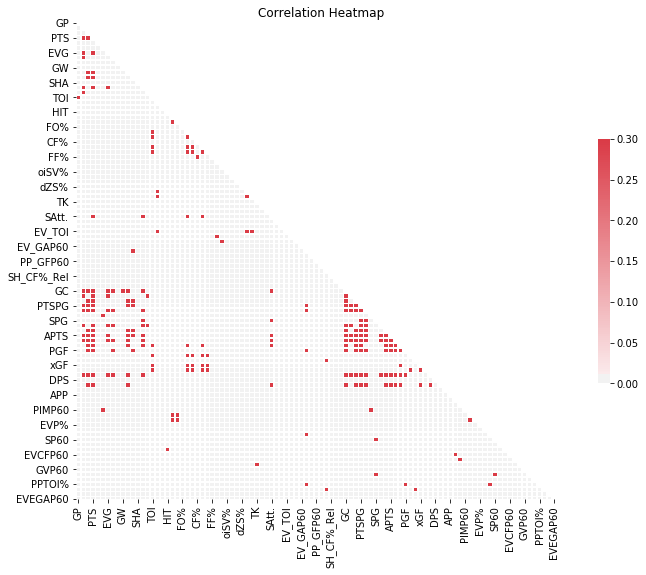

In [70]:
# Compute the correlation matrix
corr = df.corr()>.8

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap')
plt.show()

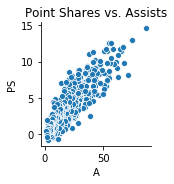

In [71]:
sns.pairplot(df, x_vars = ['A'], y_vars = ['PS'])
plt.title('Point Shares vs. Assists')
plt.show()

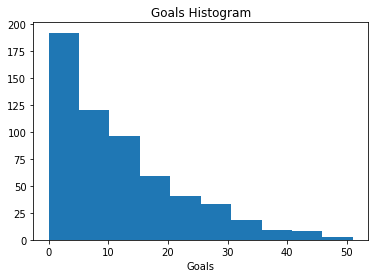

In [72]:
plt.hist(df['G'])
plt.xlabel('Goals')
plt.title('Goals Histogram')
plt.show()

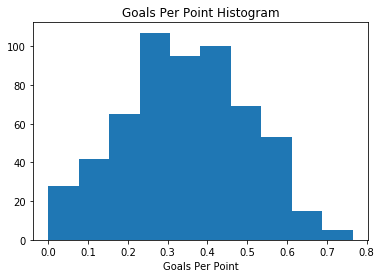

In [73]:
plt.hist(df['GPP'])
plt.xlabel('Goals Per Point')
plt.title('Goals Per Point Histogram')
plt.show()

(array([433.,  28.,  23.,  28.,  27.,  19.,   7.,   7.,   1.,   6.]),
 array([   0. ,  108.6,  217.2,  325.8,  434.4,  543. ,  651.6,  760.2,
         868.8,  977.4, 1086. ]),
 <a list of 10 Patch objects>)

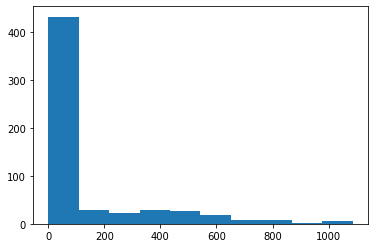

In [74]:
plt.hist(df['FOW'])

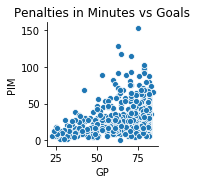

In [75]:
sns.pairplot(df, x_vars = ['GP'], y_vars = ['PIM'])
plt.title('Penalties in Minutes vs Goals')
plt.show()

In [76]:
df.corr()>.8

,GP,G,A,PTS,+/-,PIM,EVG,PPG,SHG,GW,...,TKP60,GVP60,SATTP60,EVTOI%,PPTOI%,SHTOI%,EVEGFP60,EVEGAP60,GP60,AP60
GP,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
G,False,True,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
A,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
PTS,False,True,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
+/-,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SHTOI%,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
EVEGFP60,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
EVEGAP60,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
GP60,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [77]:
df.columns

Index(['Player', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVG', 'PPG',
       ...
       'TKP60', 'GVP60', 'SATTP60', 'EVTOI%', 'PPTOI%', 'SHTOI%', 'EVEGFP60',
       'EVEGAP60', 'GP60', 'AP60'],
      dtype='object', length=101)

In [78]:
remove_columns = ['GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVG', 'PPG', 'SHG', 'GW', 'EVA', 
                  'PPA', 'SHA', 'S', 'TOI', 'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'CF', 'CA', 
                  'CF%', 'FF', 'FA', 'FF%', 'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'dZS%',
                  'TOI(EV)', 'TK', 'GV', 'E+/-', 'SAtt.', 'Shift', 'EV_TOI', 'EV_CF%_Rel', 'EV_GFP60',
                  'EV_GAP60', 'PP_TOI', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60', 'SH_TOI', 'SH_CF%_Rel', 
                  'SH_GFP60', 'SH_GAP60', 'GC', 'GPG', 'APG', 'PTSPG', 'GCPG', 'PIMPG', 'SPG', 'AG', 'AA',
                  'APTS', 'AGC', 'TGF', 'PGF', 'TGA', 'PGA', 'OPS', 'DPS', 'PS', 'xGF', 'xGA', 'GP60', 'AP60']

In [79]:
remove_df = df.drop(remove_columns, axis = 1)

In [80]:
remove_df.columns

Index(['Player', 'Pos', 'S%', 'FO%', 'oZS%', 'TOI/60', 'Thru%', 'GPP', 'APP',
       'CFP60', 'CAP60', 'PIMP60', 'FOWP60', 'FOLP60', 'EVP%', 'SHP%', 'PPP%',
       'SP60', 'BLKP60', 'HITP60', 'EVCFP60', 'EVCAP60', 'TKP60', 'GVP60',
       'SATTP60', 'EVTOI%', 'PPTOI%', 'SHTOI%', 'EVEGFP60', 'EVEGAP60'],
      dtype='object')

In [81]:
for col1 in df.columns[2:]:
    for col2 in df.columns[2:]:
        if stats.pearsonr(df[col1], df[col2])[0] > .9:
            print((col1, col2))

('GP', 'GP')
('G', 'G')
('G', 'EVG')
('G', 'GC')
('G', 'GPG')
('G', 'GCPG')
('G', 'AG')
('G', 'AGC')
('G', 'GP60')
('A', 'A')
('A', 'PTS')
('A', 'EVA')
('A', 'APG')
('A', 'PTSPG')
('A', 'AA')
('A', 'APTS')
('A', 'TGF')
('A', 'AP60')
('PTS', 'A')
('PTS', 'PTS')
('PTS', 'EVA')
('PTS', 'GC')
('PTS', 'PTSPG')
('PTS', 'GCPG')
('PTS', 'AA')
('PTS', 'APTS')
('PTS', 'AGC')
('PTS', 'OPS')
('+/-', '+/-')
('PIM', 'PIM')
('PIM', 'PIMPG')
('EVG', 'G')
('EVG', 'EVG')
('EVG', 'GPG')
('EVG', 'AG')
('EVG', 'GP60')
('PPG', 'PPG')
('SHG', 'SHG')
('GW', 'GW')
('EVA', 'A')
('EVA', 'PTS')
('EVA', 'EVA')
('EVA', 'AA')
('EVA', 'APTS')
('PPA', 'PPA')
('SHA', 'SHA')
('S', 'S')
('S', 'SAtt.')
('S', 'SPG')
('S%', 'S%')
('TOI', 'TOI')
('TOI', 'CF')
('TOI', 'CA')
('TOI', 'FF')
('TOI', 'FA')
('TOI', 'xGF')
('TOI', 'xGA')
('ATOI', 'ATOI')
('ATOI', 'TOI/60')
('ATOI', 'TOI(EV)')
('ATOI', 'EV_TOI')
('BLK', 'BLK')
('HIT', 'HIT')
('FOW', 'FOW')
('FOW', 'FOL')
('FOW', 'FOWP60')
('FOW', 'FOLP60')
('FOL', 'FOW')
('FOL', 'FOL

In [82]:
for col1 in remove_df.columns[2:]:
    for col2 in remove_df.columns[2:]:
        if stats.pearsonr(remove_df[col1], remove_df[col2])[0] > .9:
            print((col1, col2))

('S%', 'S%')
('FO%', 'FO%')
('oZS%', 'oZS%')
('TOI/60', 'TOI/60')
('Thru%', 'Thru%')
('GPP', 'GPP')
('APP', 'APP')
('CFP60', 'CFP60')
('CFP60', 'EVCFP60')
('CAP60', 'CAP60')
('CAP60', 'EVCAP60')
('PIMP60', 'PIMP60')
('FOWP60', 'FOWP60')
('FOWP60', 'FOLP60')
('FOLP60', 'FOWP60')
('FOLP60', 'FOLP60')
('EVP%', 'EVP%')
('SHP%', 'SHP%')
('PPP%', 'PPP%')
('SP60', 'SP60')
('SP60', 'SATTP60')
('BLKP60', 'BLKP60')
('HITP60', 'HITP60')
('EVCFP60', 'CFP60')
('EVCFP60', 'EVCFP60')
('EVCAP60', 'CAP60')
('EVCAP60', 'EVCAP60')
('TKP60', 'TKP60')
('GVP60', 'GVP60')
('SATTP60', 'SP60')
('SATTP60', 'SATTP60')
('EVTOI%', 'EVTOI%')
('PPTOI%', 'PPTOI%')
('SHTOI%', 'SHTOI%')
('EVEGFP60', 'EVEGFP60')
('EVEGAP60', 'EVEGAP60')


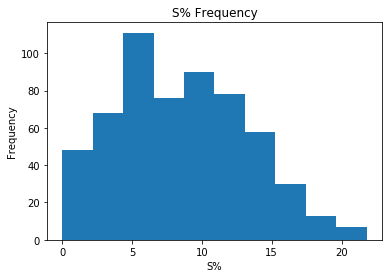

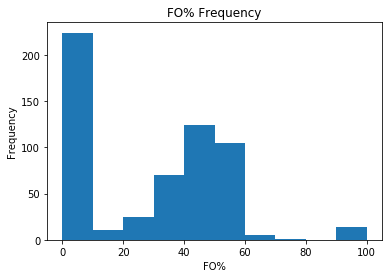

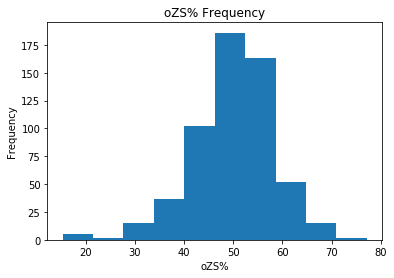

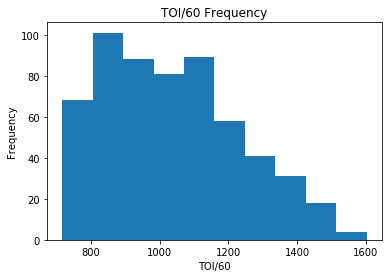

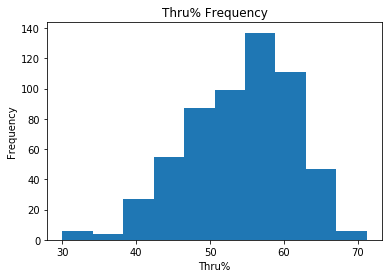

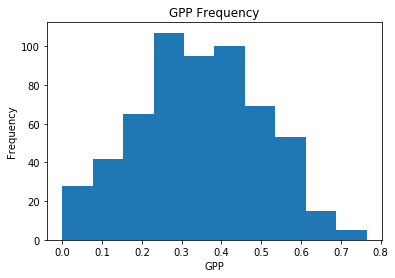

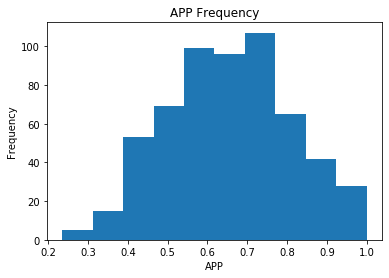

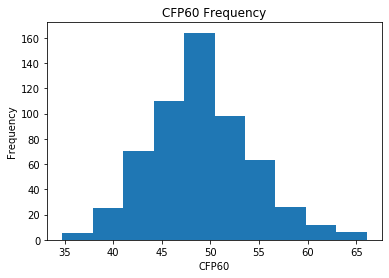

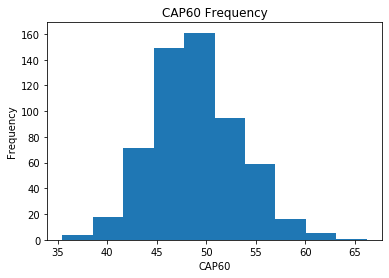

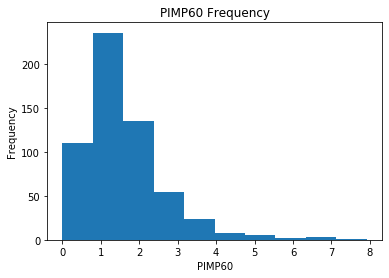

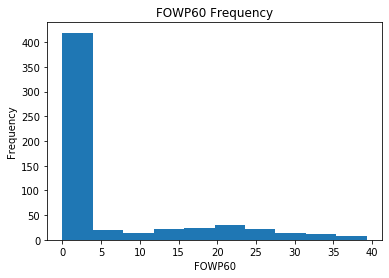

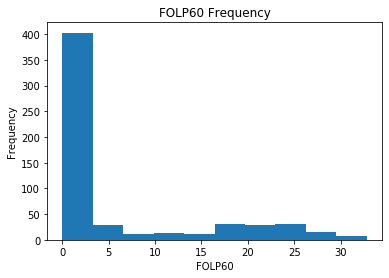

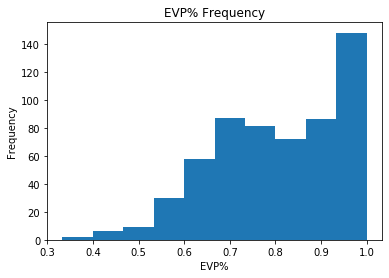

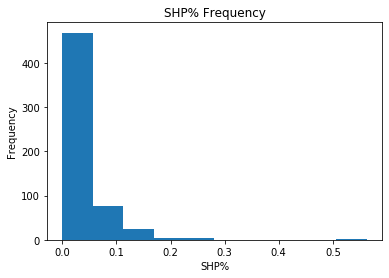

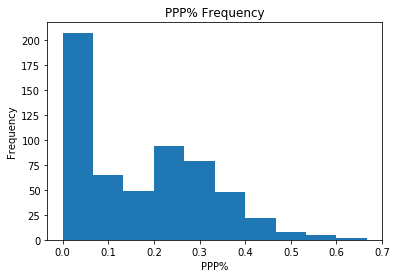

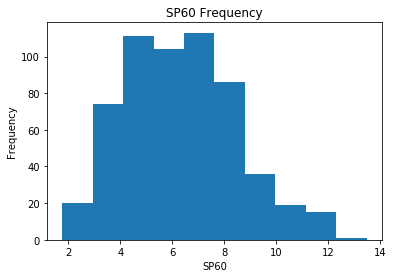

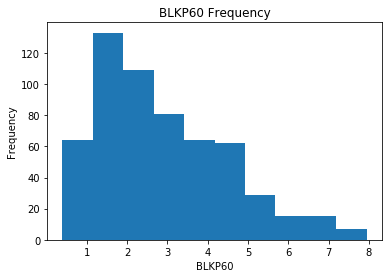

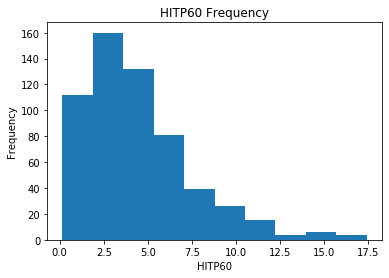

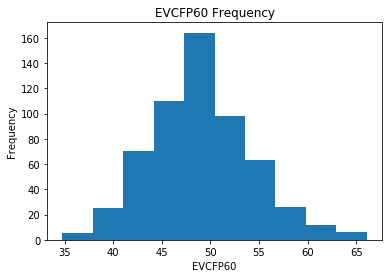

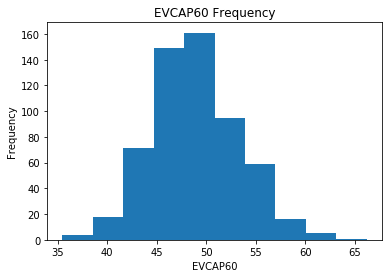

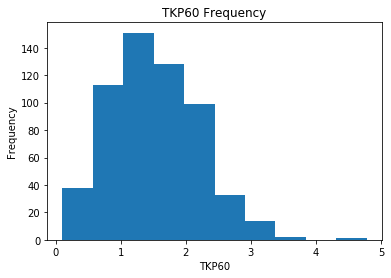

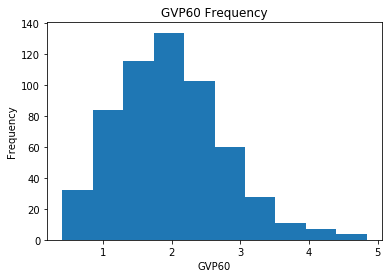

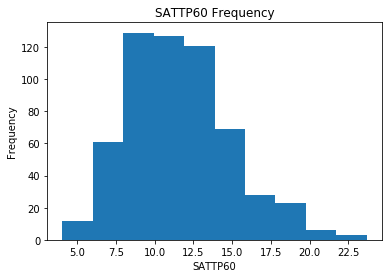

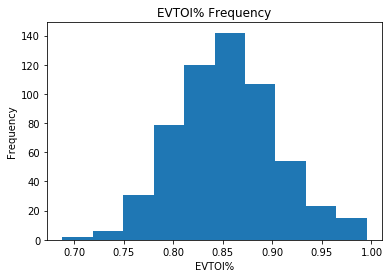

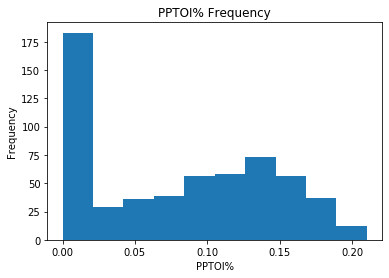

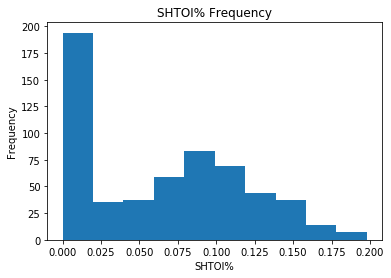

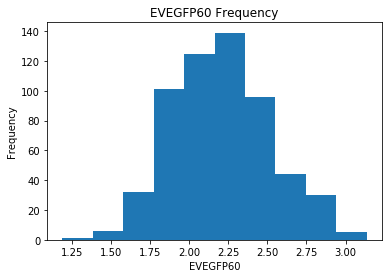

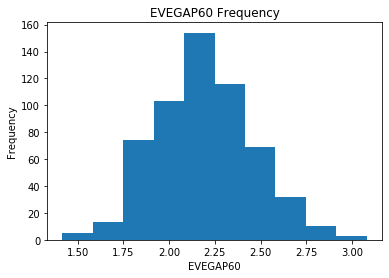

In [83]:
for var in remove_df.columns[2:]:
    plt.hist(remove_df[var])
    plt.title(var + ' Frequency')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

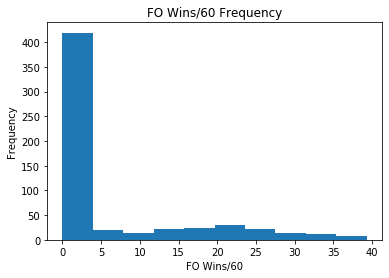

In [84]:
plt.hist(remove_df['FOWP60'])
plt.title('FO Wins/60 Frequency')
plt.xlabel('FO Wins/60')
plt.ylabel('Frequency')
plt.show()

# KMeans Models 

In [85]:
X = remove_df.drop(['Player', 'Pos'], axis = 1)

In [86]:
X.columns

Index(['S%', 'FO%', 'oZS%', 'TOI/60', 'Thru%', 'GPP', 'APP', 'CFP60', 'CAP60',
       'PIMP60', 'FOWP60', 'FOLP60', 'EVP%', 'SHP%', 'PPP%', 'SP60', 'BLKP60',
       'HITP60', 'EVCFP60', 'EVCAP60', 'TKP60', 'GVP60', 'SATTP60', 'EVTOI%',
       'PPTOI%', 'SHTOI%', 'EVEGFP60', 'EVEGAP60'],
      dtype='object')

In [87]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [88]:
k_means_sil_score_max = 0
k_means_sil_score_max_index = 0
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
for num in num_clusters:
    k_means = KMeans(n_clusters = num)
    k_means.fit(X_scaled)
    labels = k_means.labels_
# #     if metrics.silhouette_score(X, k_means, metric='euclidean') > k_means_sil_score_max:
# #         k_means_sil_score_max = metrics.silhouette_score(X, k_means, metric='euclidean')
# #         k_means_sil_score_max_index = num
    print(num, metrics.silhouette_score(X, labels, metric='euclidean'))
# print(k_means_sil_score_max_index)

2 0.044072270715957935
3 -0.03943419850528112
4 -0.06763241394826287
5 -0.044143448033413586
6 -0.08384720934974002
7 -0.09130784021122965
8 -0.07807782354037215
9 -0.08239232811767963
10 -0.12249577844404128
11 -0.14355667318903245
12 -0.15846802660362935
13 -0.1431935646771366
14 -0.1886820352076011
15 -0.16208029237943938
16 -0.1748459320386881
17 -0.1925109433251961
18 -0.17887542732181602
19 -0.17517505986997026
20 -0.22887566129740458


In [89]:
n_clusters = 10

In [90]:
k_means = KMeans(n_clusters = n_clusters)
k_means.fit(X_scaled)
y_hat = k_means.predict(X_scaled)

In [91]:
y_hat

array([6, 5, 6, 5, 5, 6, 5, 6, 5, 4, 6, 5, 0, 0, 0, 5, 6, 0, 4, 4, 5, 1,
       5, 5, 0, 6, 4, 5, 4, 4, 4, 6, 0, 6, 4, 0, 5, 1, 4, 4, 4, 6, 5, 5,
       5, 1, 6, 5, 5, 5, 1, 5, 5, 0, 0, 6, 4, 6, 6, 5, 0, 0, 0, 5, 5, 6,
       5, 1, 5, 0, 4, 6, 1, 4, 6, 1, 6, 5, 1, 1, 0, 4, 0, 0, 6, 9, 4, 1,
       1, 0, 5, 0, 0, 4, 3, 6, 0, 1, 6, 6, 0, 6, 6, 0, 5, 0, 5, 0, 6, 1,
       0, 0, 9, 4, 6, 8, 6, 0, 5, 4, 5, 9, 9, 9, 9, 9, 5, 5, 1, 9, 0, 2,
       9, 0, 1, 1, 4, 1, 1, 6, 1, 1, 9, 5, 1, 1, 1, 9, 1, 0, 0, 1, 5, 0,
       4, 5, 6, 0, 1, 3, 9, 1, 1, 4, 0, 5, 8, 6, 2, 8, 0, 6, 3, 6, 9, 9,
       6, 1, 4, 6, 3, 0, 4, 0, 7, 1, 9, 9, 9, 1, 6, 5, 0, 6, 0, 6, 9, 1,
       9, 4, 6, 0, 8, 4, 6, 0, 8, 1, 3, 4, 5, 7, 9, 4, 1, 0, 1, 9, 9, 0,
       1, 5, 5, 5, 6, 9, 0, 3, 1, 1, 0, 9, 9, 0, 9, 1, 9, 4, 1, 7, 3, 4,
       3, 3, 9, 1, 8, 1, 0, 9, 1, 1, 1, 3, 9, 8, 5, 1, 3, 7, 9, 1, 9, 3,
       0, 0, 1, 8, 2, 8, 8, 7, 1, 4, 4, 0, 8, 8, 1, 1, 9, 5, 9, 0, 1, 1,
       3, 5, 5, 1, 1, 1, 3, 8, 6, 1, 9, 0, 1, 9, 0,

In [92]:
df['y_hat'] = y_hat

In [93]:
df_list = []
for i in range(n_clusters):
    f'df_{i} = df.loc[df["y_hat"] == i]'
    df_list.append(df.loc[df["y_hat"] == i])

In [94]:
df_list[8]

,Player,Pos,GP,G,A,PTS,+/-,PIM,EVG,PPG,...,GVP60,SATTP60,EVTOI%,PPTOI%,SHTOI%,EVEGFP60,EVEGAP60,GP60,AP60,y_hat
115,Yanni Gourde,C,80,22,26,48,9,66,16,5,...,1.894238,9.897395,0.799790,0.088398,0.109445,2.358327,2.112076,1.041831,1.231255,8
166,Alex Killorn,C,82,18,22,40,22,45,15,2,...,1.081967,14.114754,0.776311,0.091858,0.131066,2.281967,1.755738,0.885246,1.081967,8
169,Tom Wilson,RW,63,22,18,40,11,128,17,3,...,2.309711,12.020997,0.799213,0.076247,0.123097,2.005249,2.451444,1.154856,0.944882,8
202,Blake Coleman,C,78,22,14,36,-19,71,16,3,...,1.627732,15.418237,0.798417,0.042125,0.157724,2.057272,2.079879,0.994725,0.633007,8
206,Bryan Rust,RW,72,18,17,35,10,24,16,0,...,1.414847,12.157205,0.866725,0.007336,0.124716,2.284716,2.342358,0.943231,0.890830,8
246,Artturi Lehkonen,LW,82,11,20,31,10,32,11,0,...,1.316614,13.683386,0.818286,0.034274,0.144592,2.496865,2.017241,0.517241,0.940439,8
255,Vladislav Namestnikov,C,78,11,20,31,-7,44,8,1,...,2.240260,10.032468,0.807224,0.087581,0.103409,1.957792,2.167208,0.535714,0.974026,8
267,Brett Pesce,D,73,7,22,29,35,24,7,0,...,1.203209,7.820856,0.870209,0.006506,0.121179,2.474599,1.856952,0.280749,0.882353,8
269,Connor Brown,RW,82,8,21,29,11,16,8,0,...,0.901857,8.488064,0.839817,0.016917,0.141379,1.771883,2.122016,0.424403,1.114058,8
270,Brandon Tanev,LW,80,14,15,29,9,41,12,0,...,0.956599,11.638618,0.845586,0.003543,0.148804,1.833481,1.860053,0.744021,0.797166,8


In [95]:
df_list[9]

,Player,Pos,GP,G,A,PTS,+/-,PIM,EVG,PPG,...,GVP60,SATTP60,EVTOI%,PPTOI%,SHTOI%,EVEGFP60,EVEGAP60,GP60,AP60,y_hat
85,Ryan Dzingel,C,78,26,30,56,-9,29,21,5,...,1.783537,11.432927,0.892759,0.105030,0.000000,2.455793,2.721037,1.189024,1.371951,9
112,Travis Konecny,C,82,24,25,49,-4,40,20,4,...,2.350120,14.196643,0.892539,0.105969,0.000000,2.220624,2.551559,1.151079,1.199041,9
121,Josh Anderson,RW,82,27,20,47,25,60,22,3,...,0.816619,16.461318,0.839971,0.080277,0.078319,2.488539,2.260745,1.160458,0.859599,9
122,Jakub Vrana,LW,82,24,23,47,20,27,23,1,...,2.606429,14.387489,0.917840,0.080741,0.000000,2.236316,2.356212,1.251086,1.198957,9
123,Andrew Shaw,C,63,19,28,47,17,71,16,3,...,1.435693,13.339980,0.824925,0.127717,0.046062,2.560319,2.374875,1.136590,1.674975,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Stefan Noesen,RW,41,3,5,8,-19,28,3,0,...,1.034483,11.724138,0.943838,0.053672,0.001309,2.103448,2.390805,0.344828,0.574713,9
601,Michael Dal Colle,LW,28,3,4,7,3,2,3,0,...,1.946903,9.203540,0.981514,0.016519,0.000000,2.743363,1.946903,0.530973,0.707965,9
627,Robby Fabbri,C,32,2,4,6,-4,6,2,0,...,0.592593,12.296296,0.927078,0.069794,0.001317,2.340741,2.429630,0.296296,0.592593,9
631,Steven Kampfer,D,35,3,3,6,-6,22,2,1,...,0.820312,10.195312,0.894368,0.062663,0.041016,2.214844,2.027344,0.351562,0.351562,9


In [96]:
mean_dict = {}
for var in df.columns[2:]:
    mean_dict[var] = [d[var].mean() for d in df_list]
print(mean_dict)

{'GP': [68.88235294117646, 70.3108108108108, 62.825581395348834, 67.83783783783784, 76.5, 72.81818181818181, 72.4888888888889, 51.03225806451613, 69.67307692307692, 67.9375], 'G': [18.36764705882353, 8.432432432432432, 3.046511627906977, 10.054054054054054, 20.305555555555557, 21.6, 24.666666666666668, 2.2096774193548385, 8.73076923076923, 13.65625], 'A': [24.86764705882353, 28.216216216216218, 11.104651162790697, 12.702702702702704, 31.916666666666668, 33.836363636363636, 31.266666666666666, 10.5, 13.307692307692308, 15.03125], 'PTS': [43.23529411764706, 36.648648648648646, 14.151162790697674, 22.756756756756758, 52.22222222222222, 55.43636363636364, 55.93333333333333, 12.709677419354838, 22.03846153846154, 28.6875], '+/-': [-6.088235294117647, -0.35135135135135137, 1.9883720930232558, 1.027027027027027, -1.1388888888888888, 0.6, 4.155555555555556, 1.9516129032258065, 0.07692307692307693, -1.03125], 'PIM': [27.455882352941178, 33.229729729729726, 34.825581395348834, 26.945945945945947

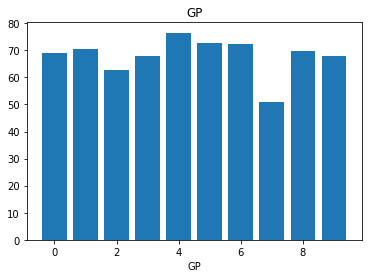

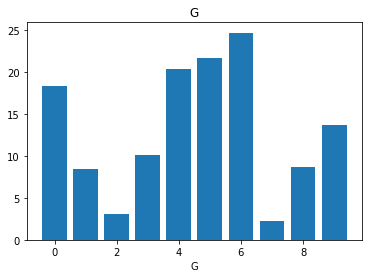

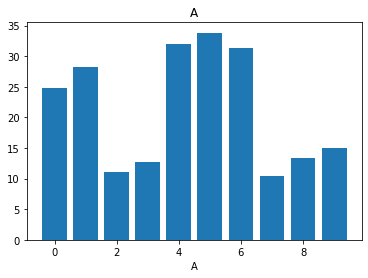

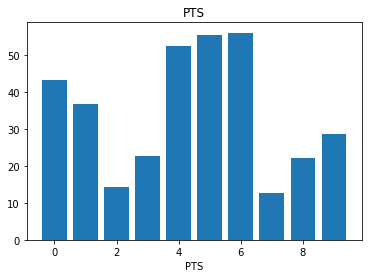

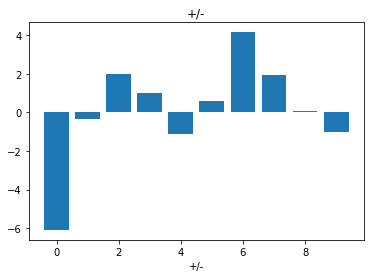

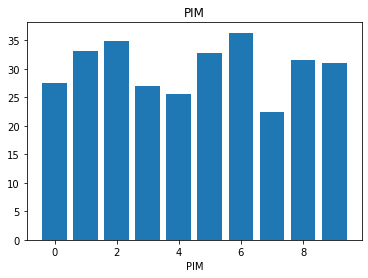

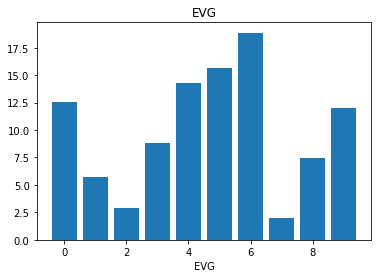

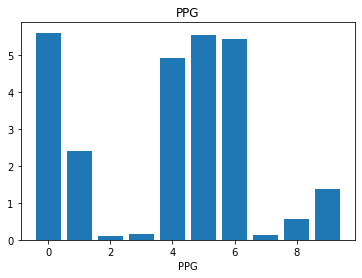

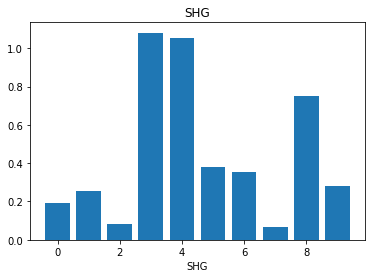

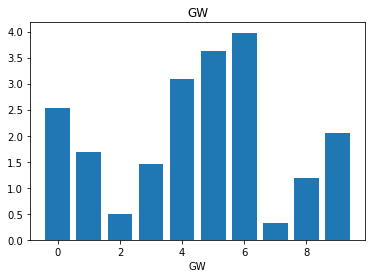

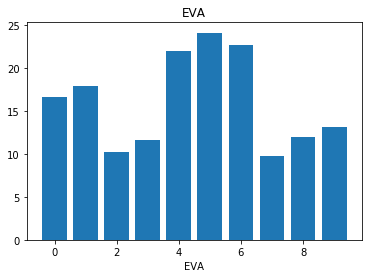

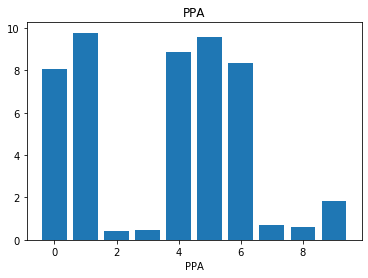

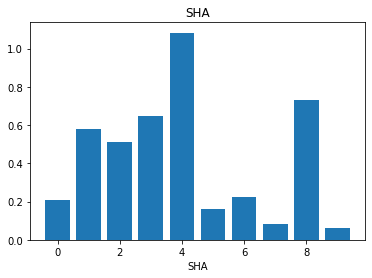

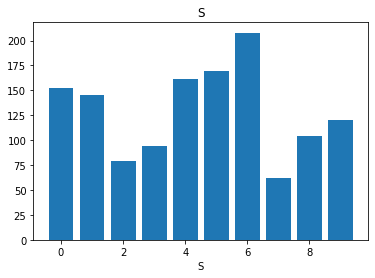

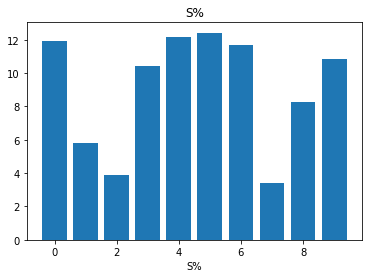

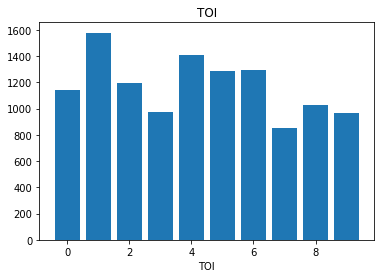

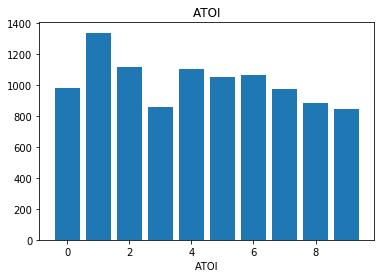

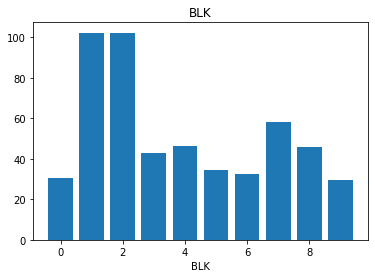

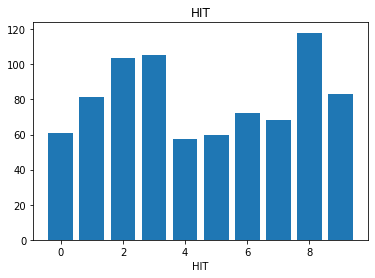

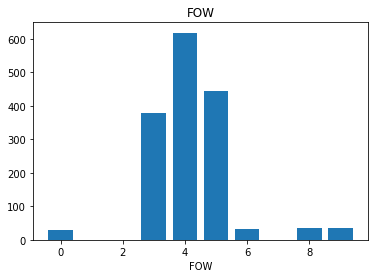

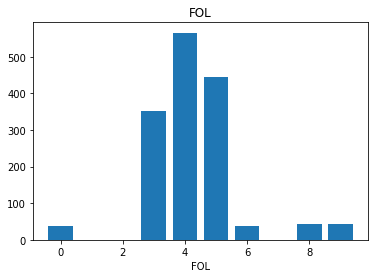

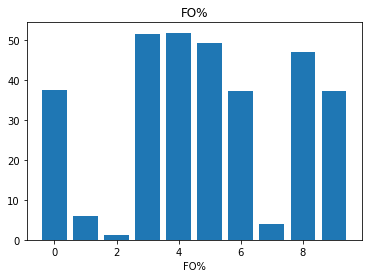

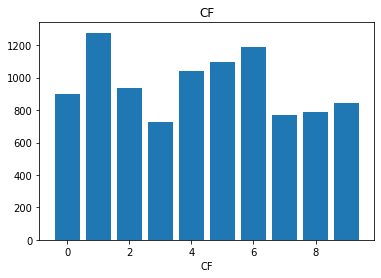

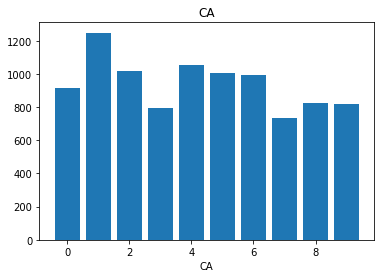

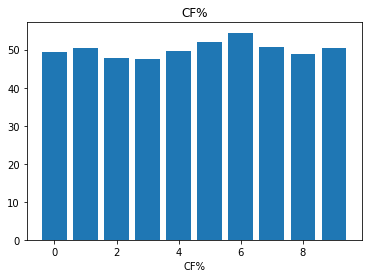

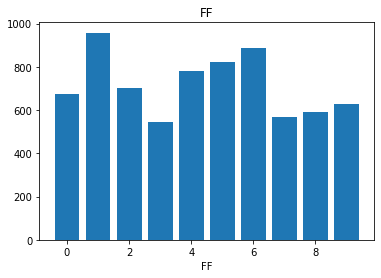

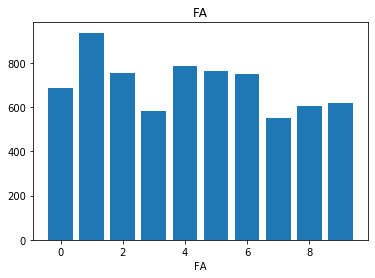

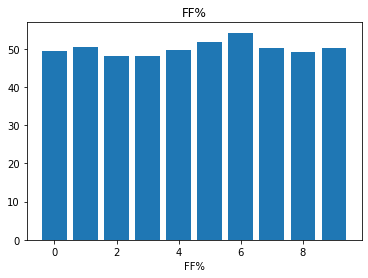

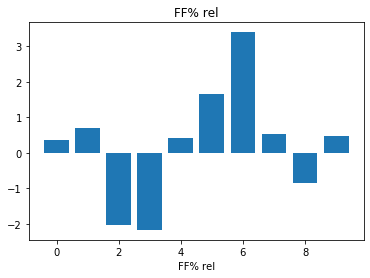

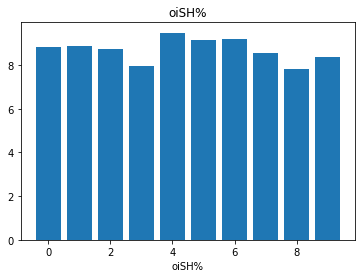

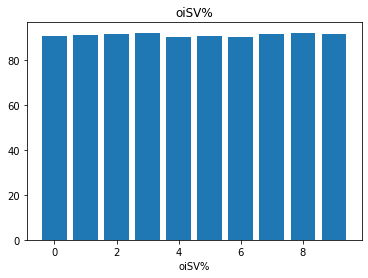

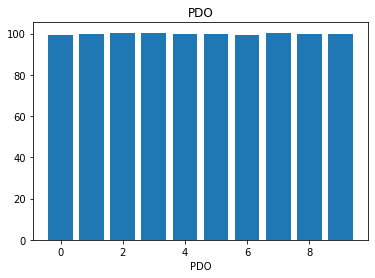

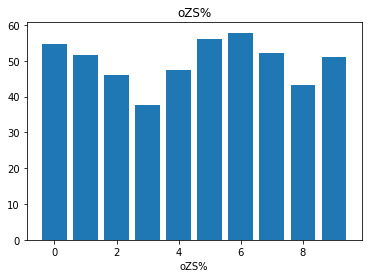

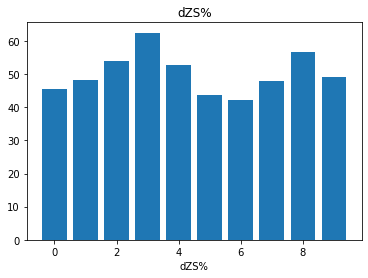

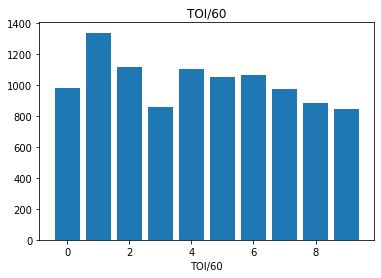

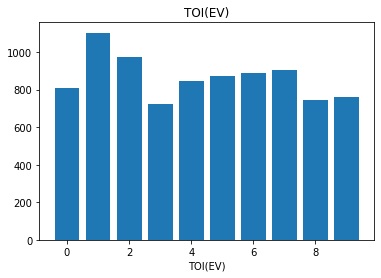

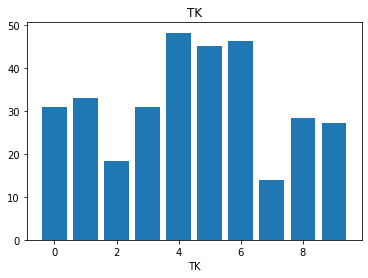

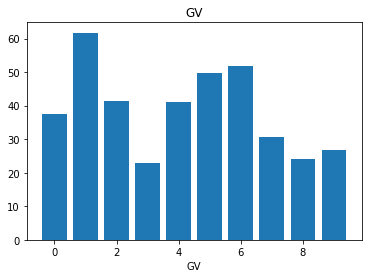

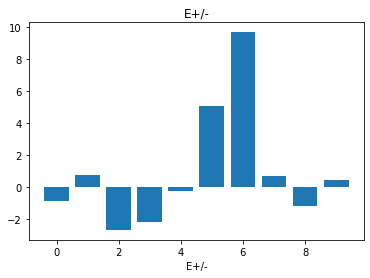

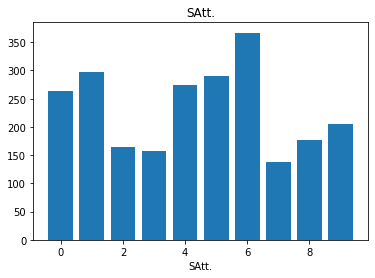

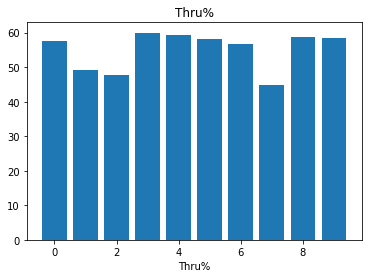

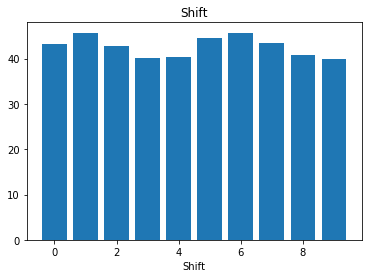

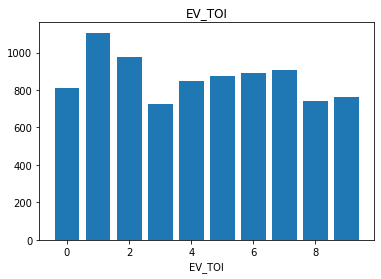

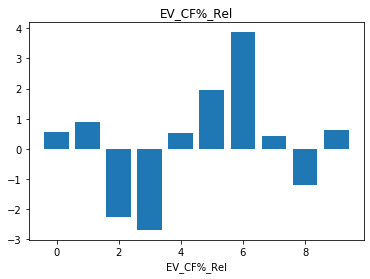

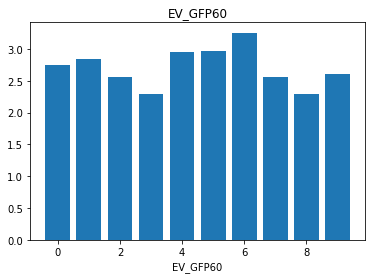

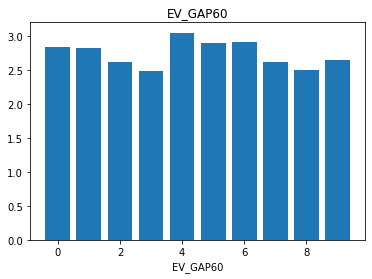

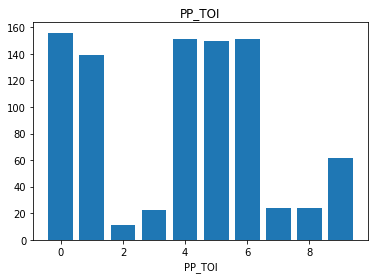

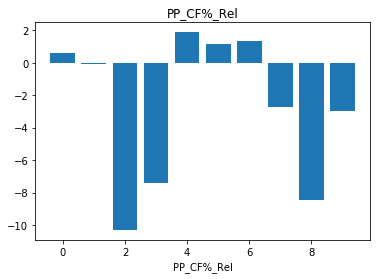

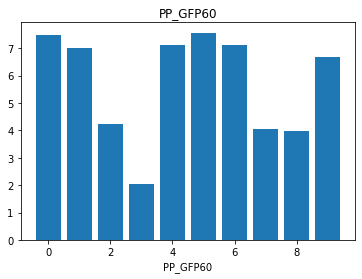

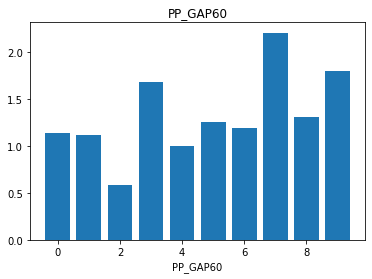

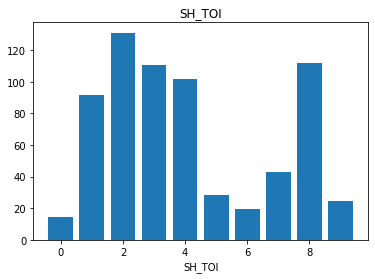

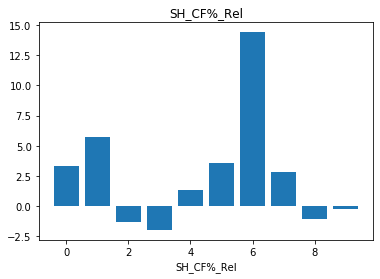

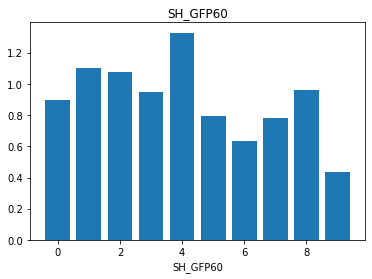

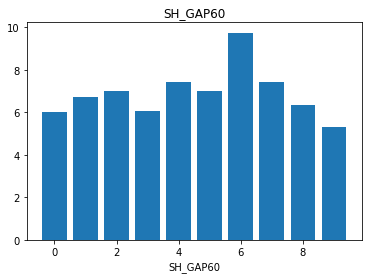

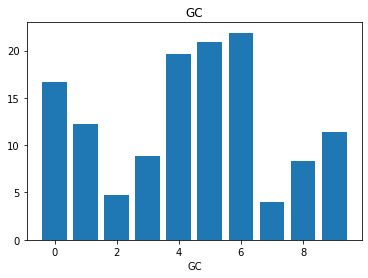

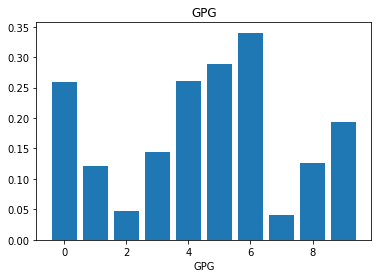

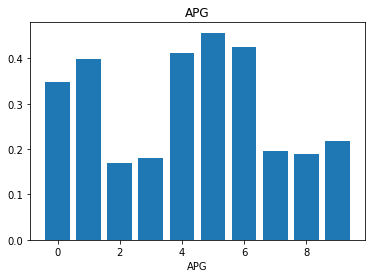

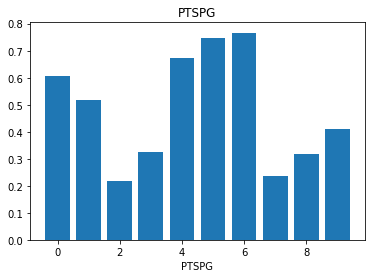

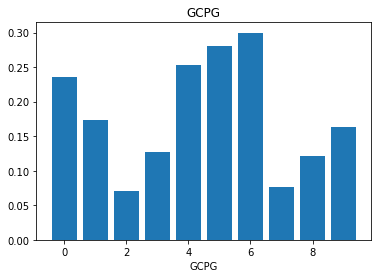

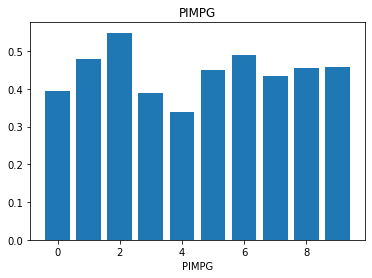

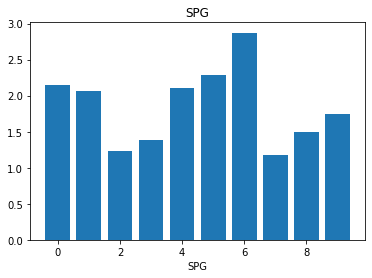

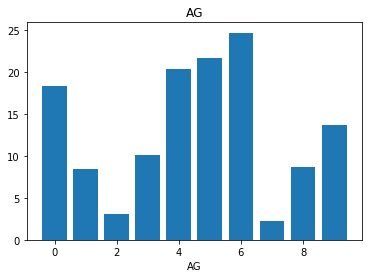

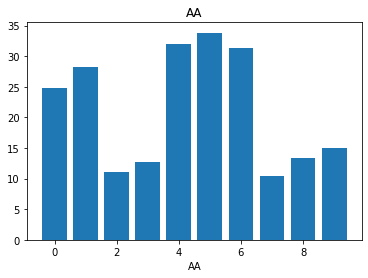

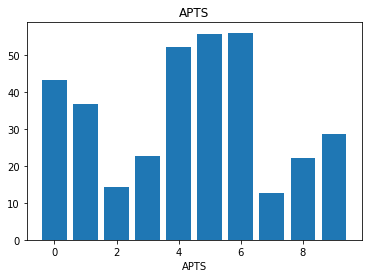

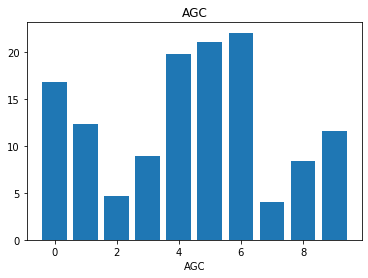

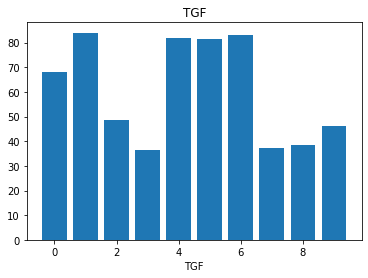

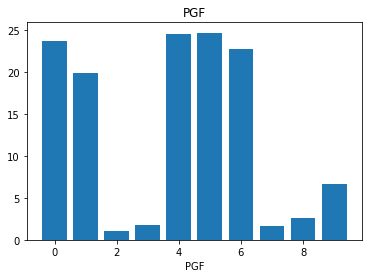

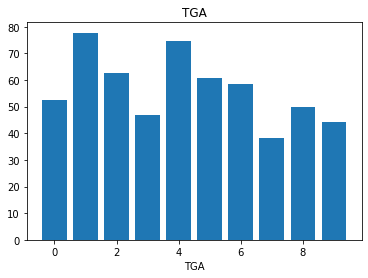

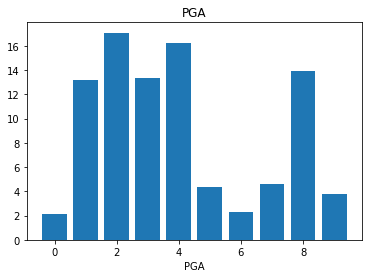

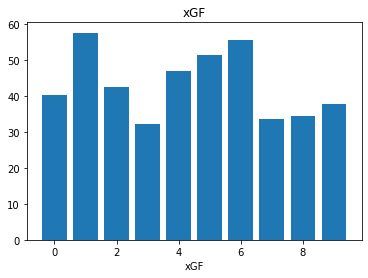

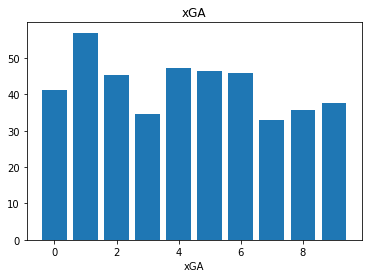

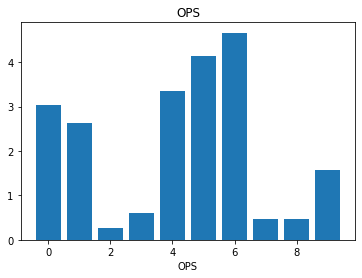

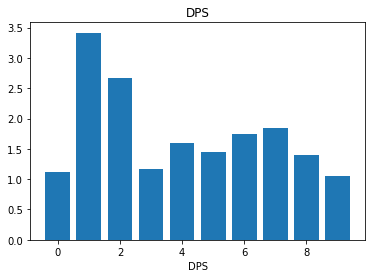

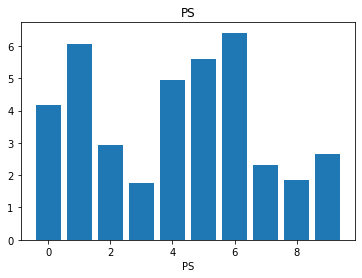

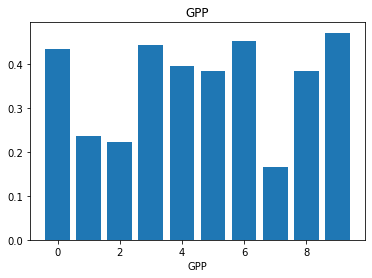

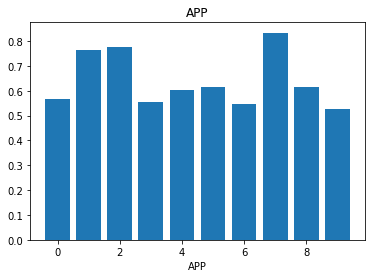

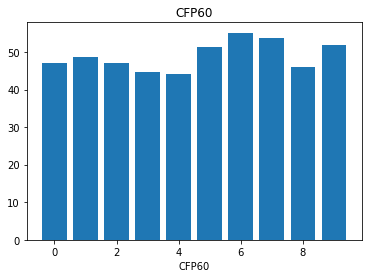

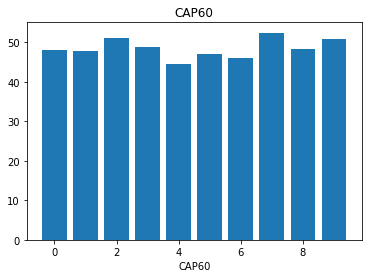

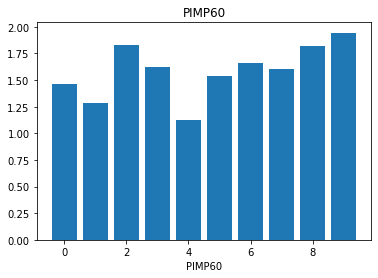

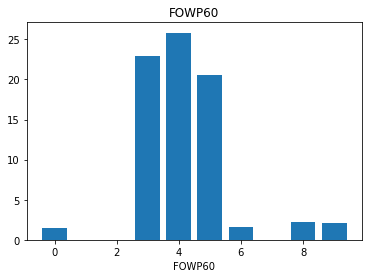

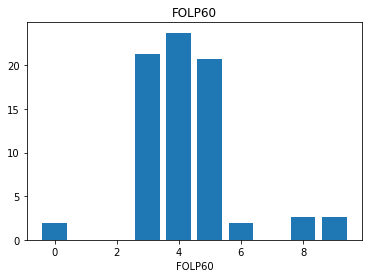

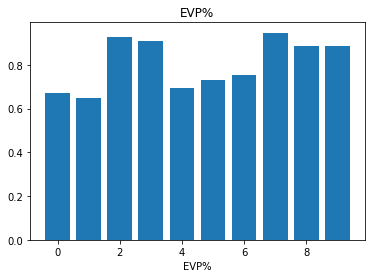

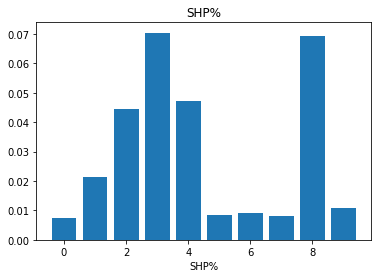

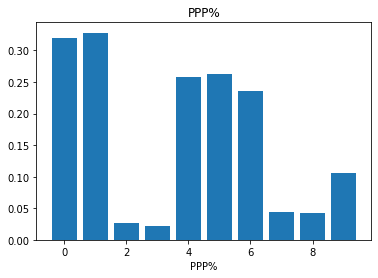

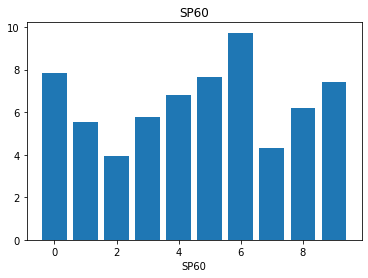

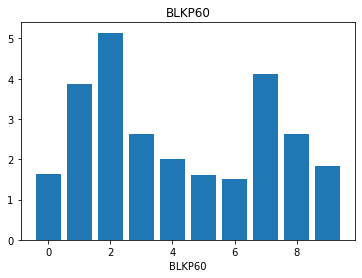

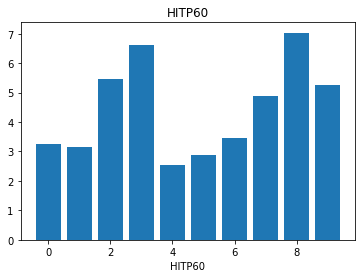

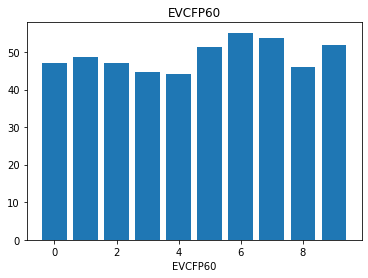

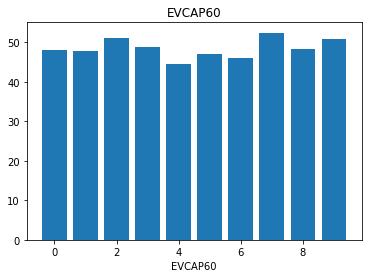

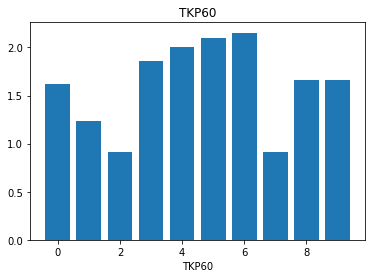

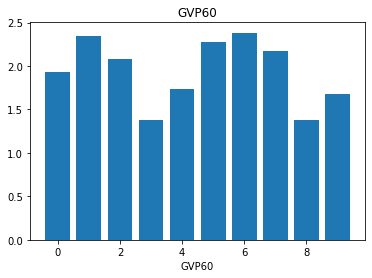

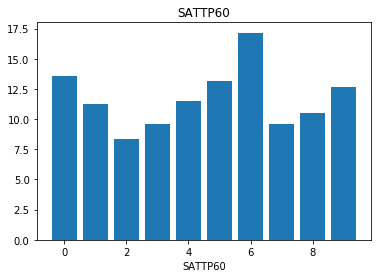

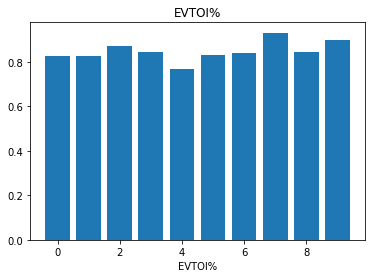

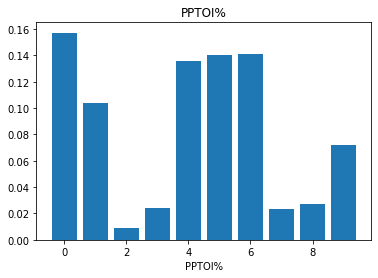

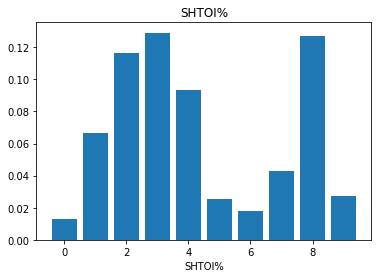

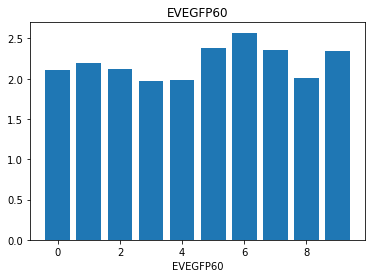

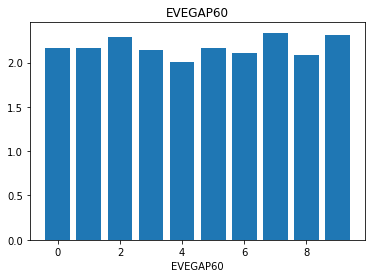

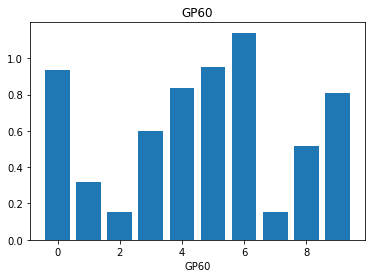

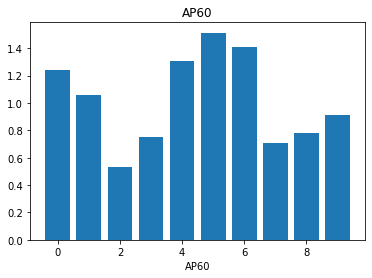

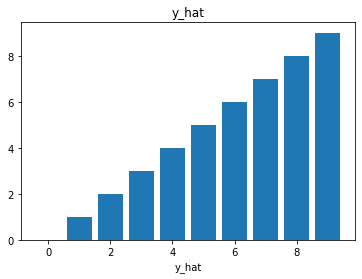

In [97]:
for key, value in mean_dict.items(): 
    plt.bar([i for i in range(len(df_list))], value)
    plt.title(key)
    plt.xlabel(key)
    plt.show()

In [98]:
agg_clust = AgglomerativeClustering(n_clusters=3)
assigned_clust = agg_clust.fit_predict(X)

0: Power-Play specialists, good at getting pucks on net, don't take a lot of faceoffs although do okay when forced to, score goals

1: Minutes eaters, assist more than goal score, don't take a lot of penalties, no FO, mostly score on powerplay, block a decent number of shots, but not too physical, commit a lot of turnovers (defensemen)

2: Block a lot of shots, solid number of hits, not a lot of takeaways but lots of giveaways, not very many shots, play SH but not PP (defensemen), take lots of penalties, score most points EV

3: High FO, low minutes, score goals, score most points EV but high SH too, low PP, lowish shots, lots of hits, take care of the puck, play a lot of SH minutes, 

4: High FO, high shot %, more assists, weak offense but good defense advanced, don't take penalties, play both on PP and PK, not very physical, high takeaways/mediumish giveaways, 

5: High S%, high FO, big assists, solid offense and defense, don't play a lot short handed, score a good amount on powerplay, decent number of shots, low blocks and hits, high takeaways and high giveaways, decent number of shot attempts, lot of powerplay time, 

6: Score goals, lot of powerplay, a lot of shot attempts, not shorthanded, lots of scoring when they're on the ice

7: Poor shooting, high assist percentage, good offense bad defense, lot of even strength, good shot blockers, pretty physical, not a lot of takeaways, high turnovers, don't really play PP or PK (defenseman)

8: High PIM, lots of hits, lots of shorthanded

9: Goal scorers (comparatively speaking), LOTS of penalties, decent number of shots, fairly physical, play some powerplay but less sh, 

In [99]:
n_clusters = 8

In [100]:
k_means = KMeans(n_clusters = n_clusters)
k_means.fit(X_scaled)
y_hat = k_means.predict(X_scaled)

In [101]:
y_hat

array([5, 3, 5, 3, 3, 5, 3, 5, 3, 3, 5, 3, 5, 5, 5, 3, 5, 5, 3, 3, 3, 4,
       3, 3, 5, 5, 3, 3, 3, 3, 3, 5, 5, 2, 3, 5, 5, 4, 3, 3, 3, 5, 3, 3,
       3, 4, 5, 3, 3, 3, 4, 3, 3, 5, 5, 5, 3, 5, 2, 3, 5, 5, 5, 3, 3, 5,
       3, 4, 3, 5, 3, 5, 4, 3, 5, 4, 2, 3, 4, 4, 5, 3, 5, 5, 5, 2, 3, 4,
       4, 5, 3, 5, 5, 3, 7, 5, 5, 4, 5, 5, 5, 5, 5, 5, 3, 5, 3, 5, 5, 4,
       5, 5, 2, 7, 5, 1, 5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 4, 2, 5, 6,
       2, 5, 4, 4, 3, 4, 4, 2, 4, 4, 2, 3, 4, 4, 4, 2, 4, 5, 5, 4, 3, 5,
       3, 3, 5, 5, 4, 7, 1, 4, 4, 3, 5, 3, 1, 5, 6, 1, 5, 5, 7, 2, 2, 2,
       5, 4, 3, 5, 7, 5, 3, 5, 0, 4, 2, 2, 2, 4, 2, 3, 5, 5, 5, 5, 2, 4,
       2, 7, 5, 5, 1, 7, 4, 2, 1, 4, 7, 3, 3, 0, 2, 3, 4, 2, 4, 2, 2, 2,
       4, 3, 3, 3, 5, 2, 5, 7, 4, 4, 2, 2, 2, 2, 2, 4, 2, 3, 4, 0, 7, 3,
       7, 7, 1, 4, 1, 4, 2, 1, 4, 4, 4, 7, 2, 1, 3, 4, 7, 0, 1, 4, 2, 7,
       5, 5, 4, 1, 6, 1, 1, 0, 4, 3, 3, 5, 1, 1, 4, 4, 2, 3, 2, 5, 4, 4,
       7, 3, 3, 4, 4, 4, 7, 1, 2, 4, 2, 2, 4, 2, 5,

In [102]:
remove_df['y_hat'] = y_hat

In [103]:
df_list = []
for i in range(n_clusters):
    f'df_{i} = remove_df.loc[df["y_hat"] == i]'
    df_list.append(remove_df.loc[df["y_hat"] == i])

In [104]:
mean_dict = {}
for var in remove_df.columns[2:]:
    mean_dict[var] = [d[var].mean() for d in df_list]
print(mean_dict)

{'S%': [11.901470588235295, 5.8175675675675675, 3.888372093023257, 10.443243243243245, 12.163888888888891, 12.42181818181818, 11.693333333333332, 3.4338709677419357], 'FO%': [37.419117647058826, 6.081081081081081, 1.1627906976744187, 51.53243243243243, 51.83055555555556, 49.232727272727274, 37.22, 4.032258064516129], 'oZS%': [54.56029411764706, 51.73378378378378, 46.08255813953488, 37.52972972972973, 47.300000000000004, 56.19272727272728, 57.84444444444444, 52.24032258064518], 'TOI/60': [983.3235294117648, 1337.7837837837837, 1117.3372093023256, 859.972972972973, 1102.7222222222222, 1052.5454545454545, 1064.6444444444444, 976.483870967742], 'Thru%': [57.51911764705882, 49.027027027027025, 47.61627906976744, 59.96756756756757, 59.224999999999994, 58.19636363636363, 56.78, 44.87903225806453], 'GPP': [0.4339971399619658, 0.23659472067588083, 0.22195971250948002, 0.4440130879841145, 0.3960628149454762, 0.38437238152650777, 0.45314562126872165, 0.16646641032047518], 'APP': [0.56600286003803

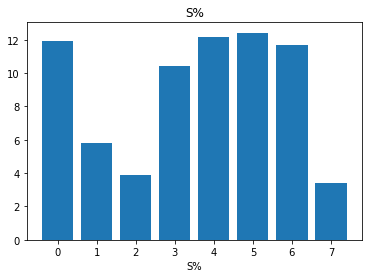

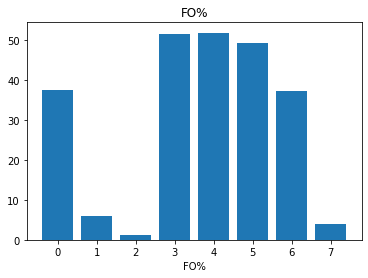

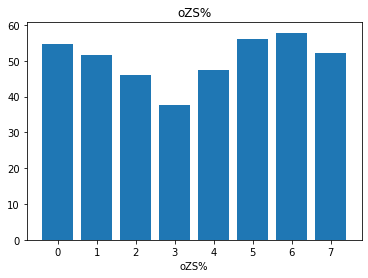

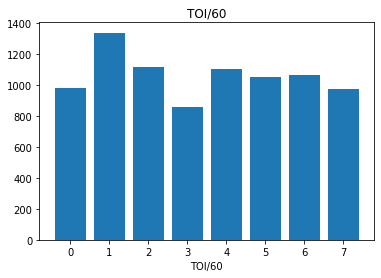

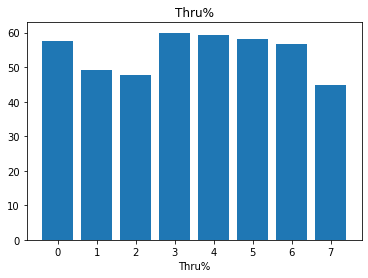

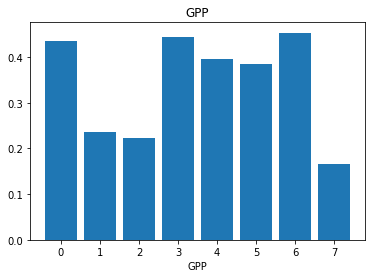

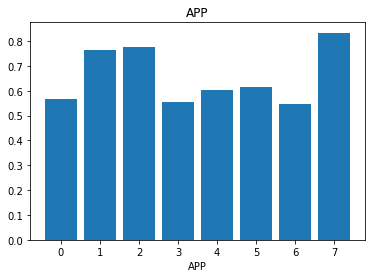

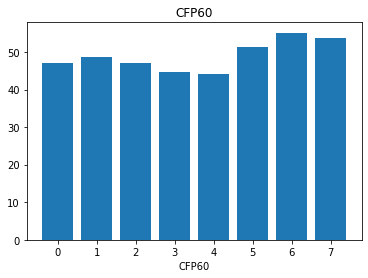

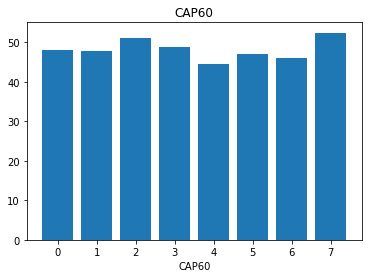

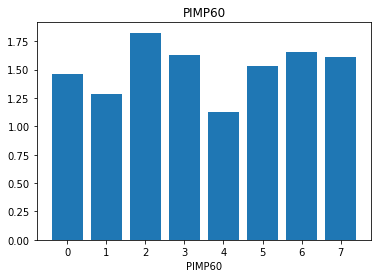

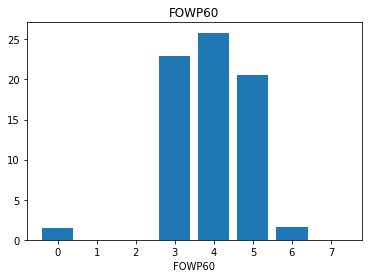

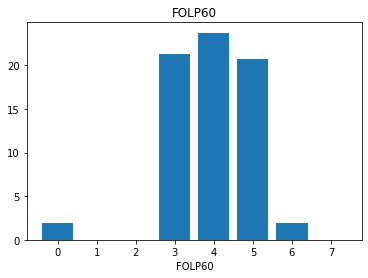

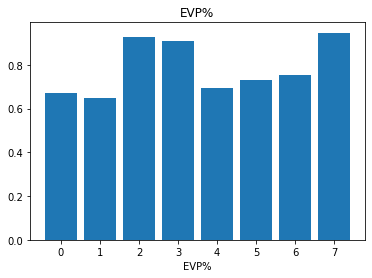

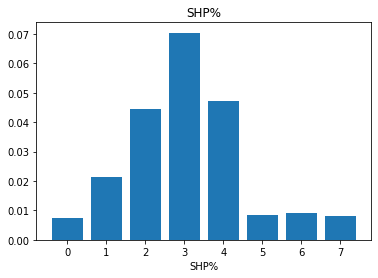

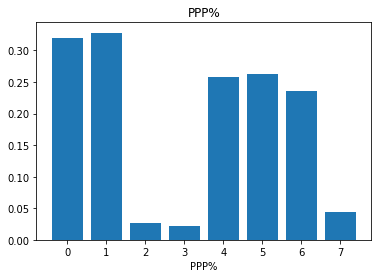

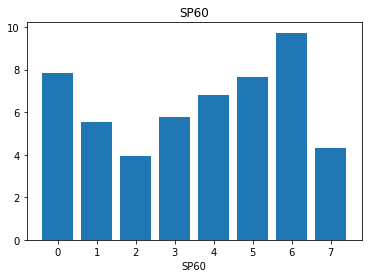

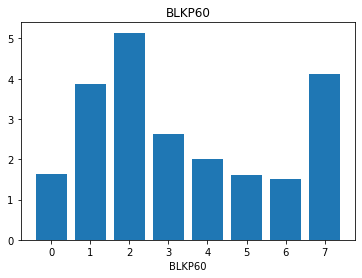

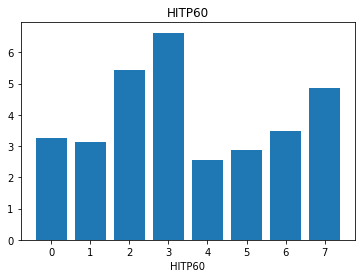

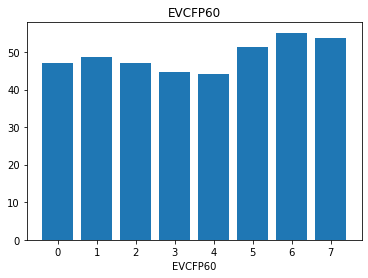

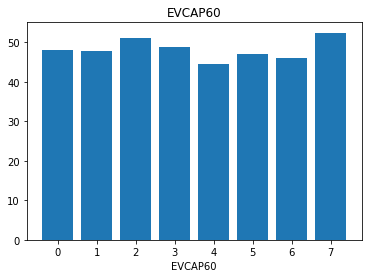

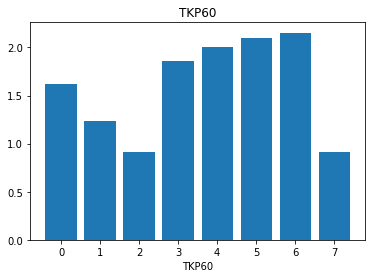

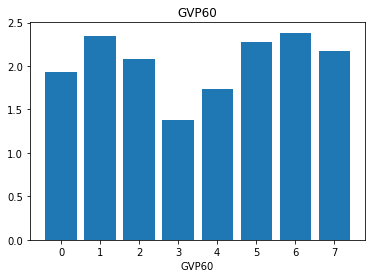

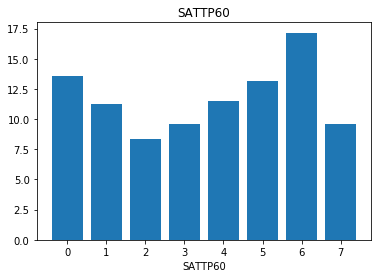

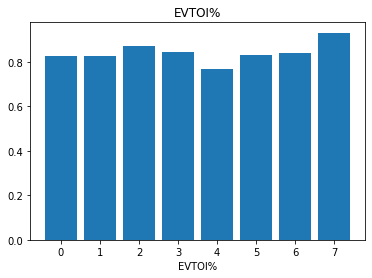

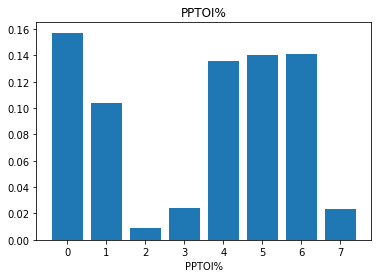

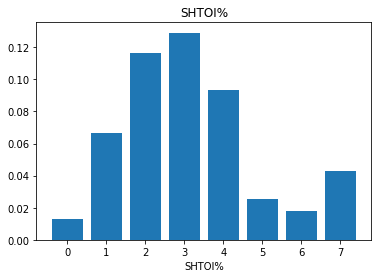

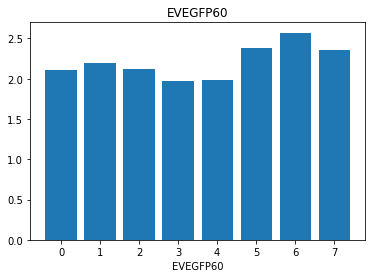

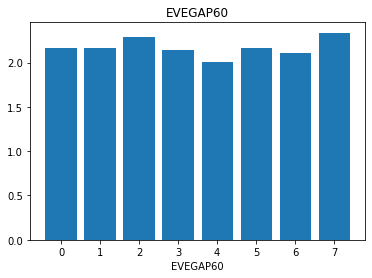

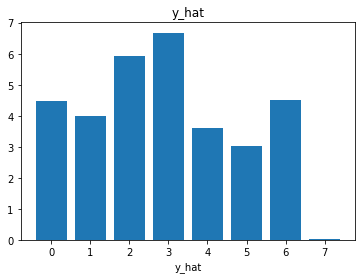

In [105]:
for key, value in mean_dict.items(): 
    plt.bar([i for i in range(len(df_list))], value)
    plt.title(key)
    plt.xlabel(key)
    plt.show()

0: High Assists, Even Strength, moderately physical (defense)

1: Heavy hitters, shorthanded

2: Offensive PP/EV players, lots of penalties, 

3: good FO, more well-rounded skill players

4: Score high percentage of points on PP (defense)

5: low FO skill players (PP)

6: shot blocking, SH (defense)

7: SH specialist, take a lot of faceoffs

In [106]:
df.columns

Index(['Player', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVG', 'PPG',
       ...
       'GVP60', 'SATTP60', 'EVTOI%', 'PPTOI%', 'SHTOI%', 'EVEGFP60',
       'EVEGAP60', 'GP60', 'AP60', 'y_hat'],
      dtype='object', length=102)

In [107]:
# X = df.drop(['Player', 'Pos'], axis = 1)

In [108]:
# X.columns

In [109]:
# scaler = MinMaxScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)

In [110]:
# n_clusters = 30

In [111]:
# k_means = KMeans(n_clusters = n_clusters)
# k_means.fit(X_scaled)
# y_hat = k_means.predict(X_scaled)

In [112]:
# y_hat

In [113]:
# df['y_hat'] = y_hat

In [114]:
# df_list = []
# for i in range(n_clusters):
#     f'df_{i} = df.loc[df["y_hat"] == i]'
#     df_list.append(df.loc[df["y_hat"] == i])

In [115]:
# mean_dict = {}
# for var in df.columns[2:]:
#     mean_dict[var] = [d[var].mean() for d in df_list]
# print(mean_dict)

In [116]:
# for key, value in mean_dict.items(): 
#     plt.bar([i for i in range(len(df_list))], value)
#     plt.title(key)
#     plt.xlabel(key)
#     plt.show()

In [117]:
# df_list[5]